In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from matplotlib.ticker import *

% matplotlib inline

In [2]:
os.chdir('C:/Users/Taha/OneDrive - DePaul University/Kaggle/Bike Sharing')

In [3]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [4]:
train_copy = train.copy()

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
print train.shape
print test.shape

(10886, 12)
(6493, 9)


### Removing the columns that are not present in the testing set

In [8]:
train_count = train.count
col_to_drop = ['casual', 'registered']
train.drop(col_to_drop,inplace=True,axis=1)
print train.shape

(10886, 10)


In [9]:
col_object = ['season', 'holiday', 'weather', 'workingday']
for col in col_object:
    train[col] = train[col].astype(object)
    test[col] = test[col].astype(object)
    
print train.dtypes
print test.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object
datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


# Basic Statistics

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


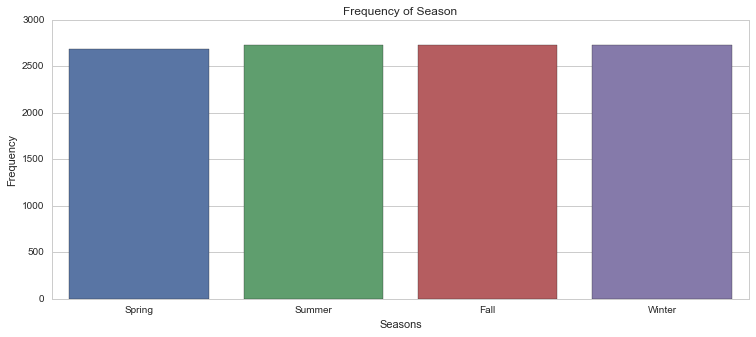

In [11]:
plt.rcParams['figure.figsize'] = 12.5, 5
ax = sns.countplot(x="season", data=train)
plt.title('Frequency of Season')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
labels = ['Spring','Summer', 'Fall', 'Winter']
ax.set_xticklabels(labels)

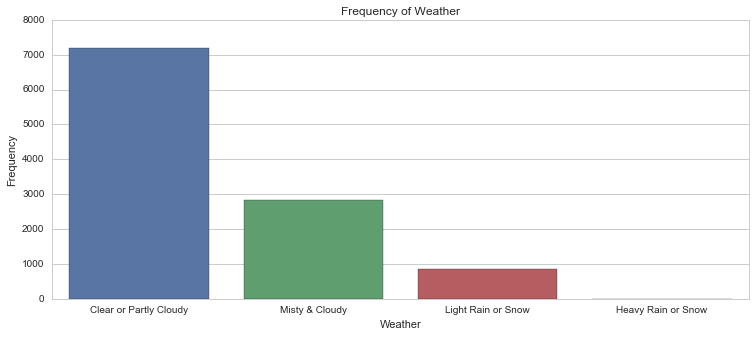

In [12]:
plt.rcParams['figure.figsize'] = 12.5, 5
ax = sns.countplot(x="weather", data=train)
plt.title('Frequency of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
labels = ['Clear or Partly Cloudy','Misty & Cloudy', 'Light Rain or Snow', 'Heavy Rain or Snow']
ax.set_xticklabels(labels)

[<matplotlib.text.Text at 0xac6c588>, <matplotlib.text.Text at 0xb154860>]

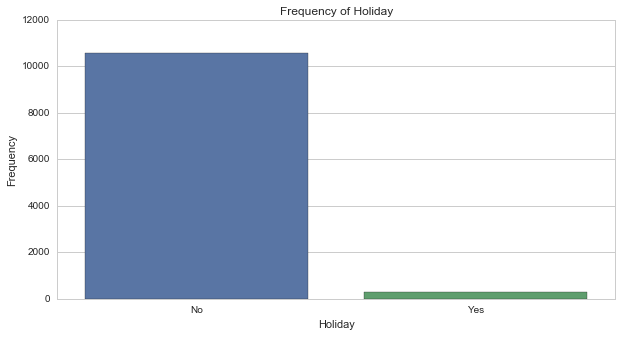

In [13]:
plt.rcParams['figure.figsize'] = 10, 5
ax = sns.countplot(x="holiday", data=train)
plt.title('Frequency of Holiday')
plt.xlabel('Holiday')
plt.ylabel('Frequency')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)

[<matplotlib.text.Text at 0xb218c50>, <matplotlib.text.Text at 0xb23c5f8>]

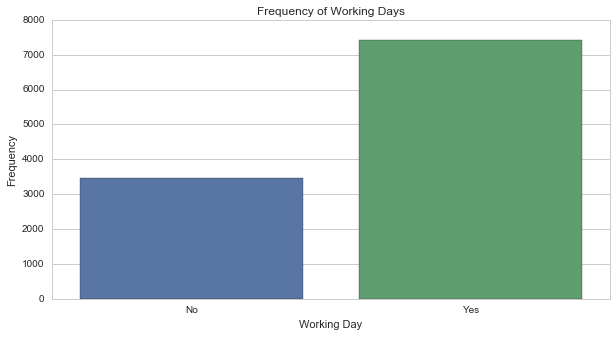

In [14]:
plt.rcParams['figure.figsize'] = 10, 5
ax = sns.countplot(x="workingday", data=train)
plt.title('Frequency of Working Days')
plt.xlabel('Working Day')
plt.ylabel('Frequency')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)

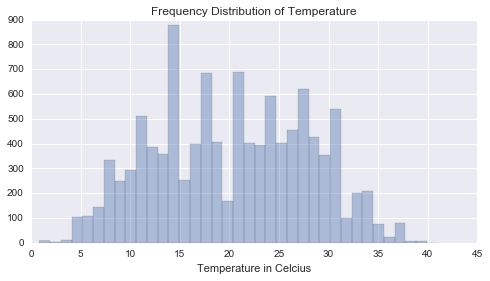

In [15]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.temp
ax = sns.distplot(x, hist= True, kde = False)
plt.xlabel('Temperature in Celcius')
plt.title('Frequency Distribution of Temperature')

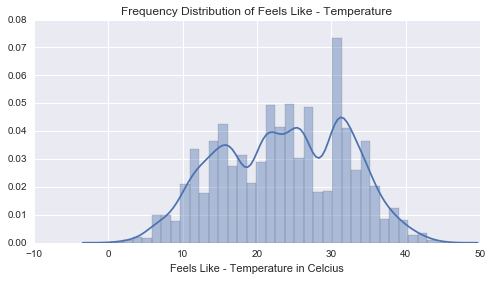

In [16]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.atemp
ax = sns.distplot(x, hist= True)
plt.xlabel('Feels Like - Temperature in Celcius')
plt.title('Frequency Distribution of Feels Like - Temperature')

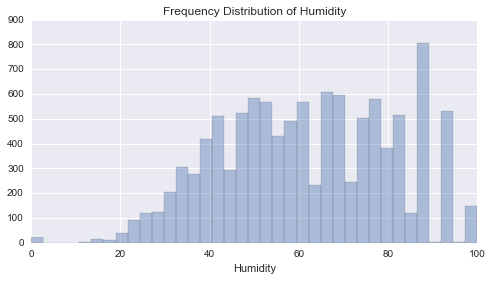

In [17]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.humidity
ax = sns.distplot(x, hist= True, kde = False)
plt.xlabel('Humidity')
plt.title('Frequency Distribution of Humidity')

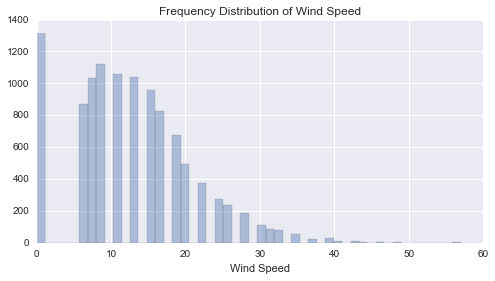

In [18]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.windspeed
ax = sns.distplot(x, kde = False)
plt.xlabel('Wind Speed')
plt.title('Frequency Distribution of Wind Speed')

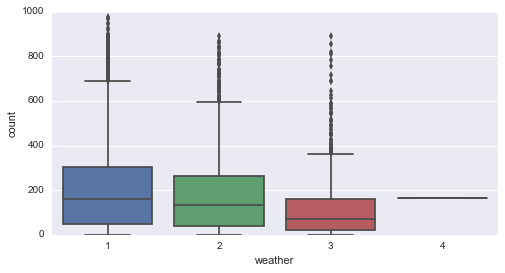

In [19]:
sns.boxplot(x="weather", y="count", data=train)

In [20]:
train['time_hour'] = train.datetime.apply(lambda x: x.hour)

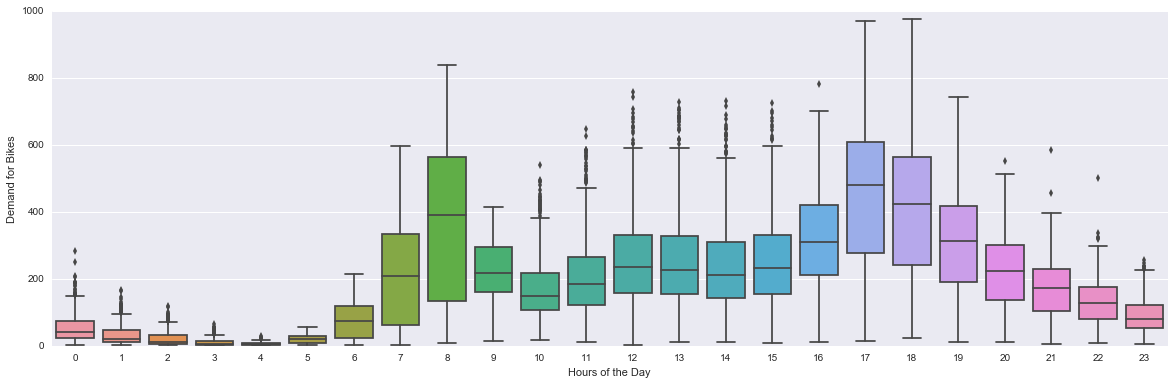

In [21]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.boxplot(x="time_hour", y="count", data=train)
plt.xlabel('Hours of the Day')
plt.ylabel('Demand for Bikes')

In [22]:
train['weekday'] = train.datetime.apply(lambda x: x.weekday())

In [23]:
to_change = [0,1,2,3,4,5,6]
new = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
train['alpha_week'] = train['weekday']
train['alpha_week'].replace(to_change, new, inplace = True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time_hour,weekday,alpha_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,5,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,5,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,5,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,5,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,5,Sat


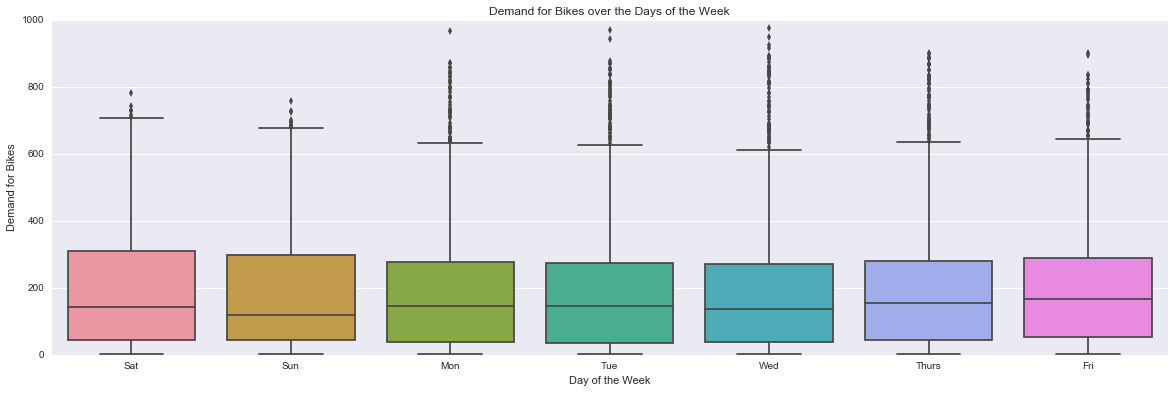

In [24]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.boxplot(x="alpha_week", y="count", data=train)
plt.xlabel('Day of the Week')
plt.ylabel('Demand for Bikes')
plt.title('Demand for Bikes over the Days of the Week')

# Checking for the Correlation among the remaining continous variables

In [25]:
df_cont = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
df_cont.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [26]:
train['year'] = train.datetime.apply(lambda x: x.year)

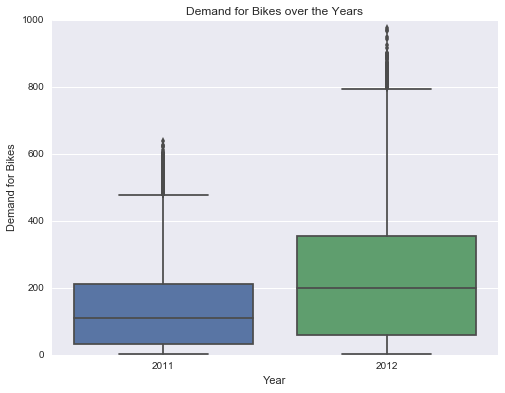

In [27]:
sns.set(rc={"figure.figsize": (8, 6)})
sns.boxplot(x="year", y="count", data=train)
plt.xlabel('Year')
plt.ylabel('Demand for Bikes')
plt.title('Demand for Bikes over the Years')

In [28]:
train['month'] = train.datetime.apply(lambda x: x.month)

to_change = [1,2,3,4,5,6,7,8,9,10,11,12]
new = ['Jan', 'Feb', 'Mar', "Apr", 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
train['alpha_mon'] = train['month']
train['alpha_mon'].replace(to_change, new, inplace = True)

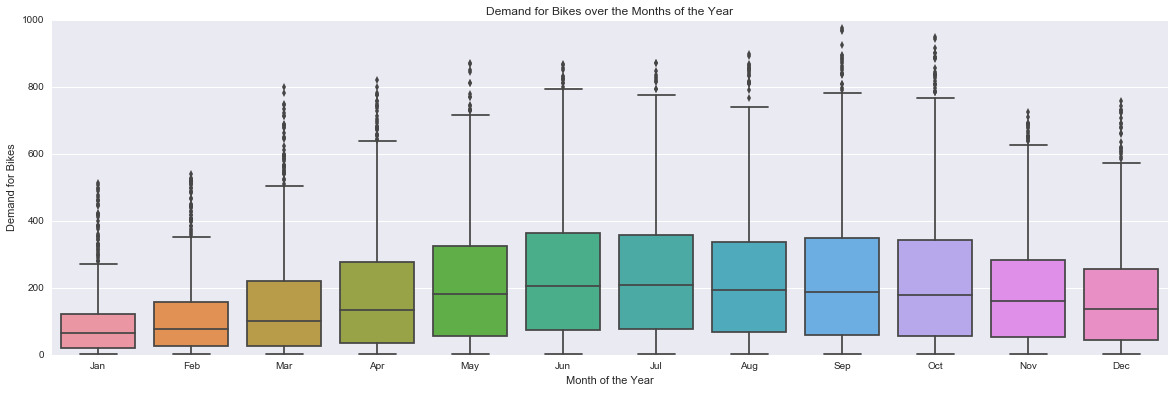

In [29]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.boxplot(x="alpha_mon", y="count", data=train)
plt.xlabel('Month of the Year')
plt.ylabel('Demand for Bikes')
plt.title('Demand for Bikes over the Months of the Year')

[<matplotlib.text.Text at 0x19720780>, <matplotlib.text.Text at 0x1b3bf080>]

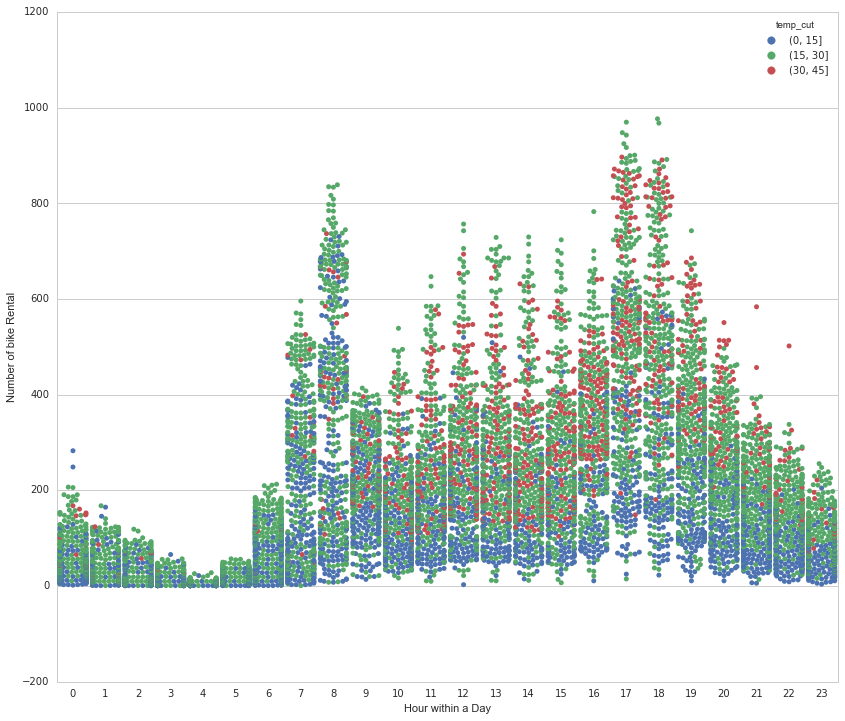

In [185]:
train['temp_cut']=pd.cut(train.temp,[0,15,30,45,])
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='time_hour',y='count',hue='temp_cut',data=train)
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

In [30]:
train.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'count', u'time_hour', u'weekday',
       u'alpha_week', u'year', u'month', u'alpha_mon'],
      dtype='object')

In [ ]:
'season' , 'workingday', 'weather' ,'temp' ,'atemp', 'humidity', 'windspeed', 'time_hour', 'weekday', 'year', 'month'

In [31]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time_hour,weekday,alpha_week,year,month,alpha_mon
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,5,Sat,2011,1,Jan
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,5,Sat,2011,1,Jan
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,5,Sat,2011,1,Jan
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,5,Sat,2011,1,Jan
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,5,Sat,2011,1,Jan


In [ ]:
## XG Boost 

In [32]:
feature_cols = ['season' , 'workingday', 'weather' ,'temp' ,'atemp', 'humidity', 'windspeed', 'time_hour', 'weekday', 'year', 'month']

mat = np.matrix(train[feature_cols])
target = (np.array(train['count'])).T

print mat.shape
print (target.shape)


(10886L, 11L)
(10886L,)


In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mat, target, test_size=0.3, random_state=33)

print X_train.shape
print X_test.shape

(7620L, 11L)
(3266L, 11L)


In [34]:
Y_test

array([329,  12,  44, ..., 129,  25, 222], dtype=int64)

In [35]:
print Y_test.shape
print Y_train.shape

(3266L,)
(7620L,)


In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(X_train)
# Now we can constuct a vector of errors
err = abs(p-Y_train)

# Let's see the error on the first 10 predictions
print err[:10]

[  85.46944465   97.61040131   35.98058658   62.22902063  151.42803184
  440.95516479   65.73248473  110.11373909  103.04879485    1.95798014]


In [38]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

141.706962975


In [39]:
from sklearn.cross_validation import KFold
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(mat), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(mat[train],target[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(mat[test])
    e = p-target[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(mat))

In [40]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 141.7070
RMSE on 10-fold CV: 143.7043



Correlation coefficients:

[[ 1.          0.97479351]
 [ 0.97479351  1.        ]]

Feature importances:

[ 0.02557438  0.07810151  0.01974412  0.06347116  0.06223341  0.04073247
  0.01029836  0.57011374  0.01996549  0.08086062  0.02890474]


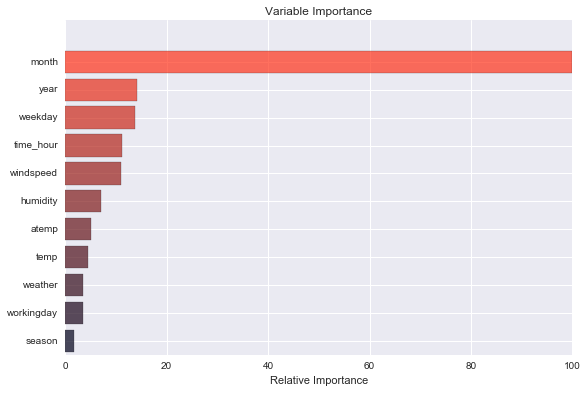

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
params = {'n_estimators': 50, 'random_state': np.random.RandomState(1)}

clf = ExtraTreesRegressor(**params)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print('\nCorrelation coefficients:\n')
print(np.corrcoef(y_pred, Y_test))
print('\nFeature importances:\n')
print(clf.feature_importances_ )

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)


# Set color transparency (0: transparent; 1 solid)
a = 0.7
# Create a colormap
customcmap = [(x/10.0,  x/50.0, 0.1) for x in range(len(clf.feature_importances_))]
plt.barh(pos, feature_importance[sorted_idx], align='center',  alpha=a, color=customcmap)
plt.yticks(pos, feature_cols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()